# Ordinary differential equations
In this notebook we'll take a look at the basics of ordinary differential equations (or ODEs) and the tools that SciPy provides to solve them.
## The basic theory

A first order ordinary differential equation takes the form
$$y' = f(y,t).$$
In this equation, $f$ is a function of the two variables $y$ and $t$ where $t$ is an independent variable and $y$ is assumed to be a function of $t$. A solution is a function $y(t)$ that makes the equation true.

For example, if $f(y,t) = t^2-y$, then any function of the form 
$$y(t)=ce^{-t}+t^2-2t+2$$
solves the equation since
$$y'(t) = -ce^{-t}+2t-2 = t^2-(ce^{-t}+t^2-2t+2) = t^2-y(t).$$

Often, an ODE will be accompanied by an initial condition to form an initial value problem (or IVP). If, in the above problem, we require that $y(0)=0$, then $c$ is forced to be $-2$.

## `odeint`
The basic ODE solver in SciPy is `scipy.integrate.odeint`. Let's import it together with some of our standard imports. We'll also have the opportunity to play with some new kinds of plots, including a complex parametrized plot through 3D space. So, we'll import `Axes3D` as well.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import derivative

# New stuff!
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

Let's use `odeint` to solve the IVP above. (`odeint` *only* works with IVPs, i.e. there *must* be an initial condition as well as an ODE.) It's really pretty easy to use.

In [2]:
def f(y,t): return t**2 - y
ts_p = np.linspace(0,3)
sol_p = odeint(f,0,ts_p)
sol_p[:8]

array([[  0.00000000e+00],
       [  7.53111328e-05],
       [  5.93679763e-04],
       [  1.97398018e-03],
       [  4.61026764e-03],
       [  8.87312480e-03],
       [  1.51112286e-02],
       [  2.36524774e-02]])

The solution is simply a list of $y$ values representing the function at the corresponding $t$ values. The `_p` on the `ts` and `sol` indicate that we're looking at the solution in the positive direction. We can generate the solution at the negative values as well.

In [3]:
ts_m = np.linspace(0,-3)
sol_m = odeint(f,0,ts_m)

Let's plot these two parts of the solution as the solution passes through the slope field defined by the equation. Keep in mind that $y'=f(y,t)$ so, if we plot $y(t)$ in the $ty$-plane, then the graph passes through a point $(t,y)$ with slope $f(y,t)$.

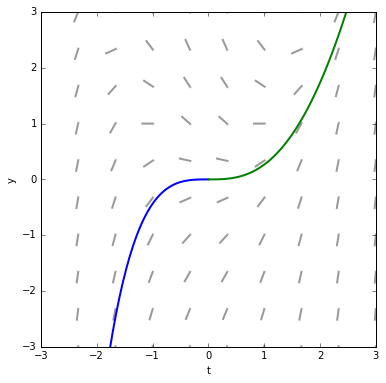

In [4]:
# These two lines plot the two parts to the left and right
plt.plot(ts_m,sol_m, linewidth=2)
plt.plot(ts_p,sol_p, linewidth=2)

# This next session plots the slope field using plt.quiver
T,Y = np.meshgrid( np.linspace(-3,3,10),np.linspace(-3,3,10) )
U = 1
V = f(Y,T)
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
plt.quiver(T,Y,U2, V2, 
    headwidth=0, units='xy', scale=2.5, pivot='middle', 
    alpha=0.4)

# Set some plot characteristics
ax=plt.gca()
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_aspect(1)
ax.set_xlabel("t")
ax.set_ylabel("y")
fig = ax.get_figure()
fig.set_figheight(8)

This graph gives us a *qualitative* way to think about the solution. The simplest way to numerically compute the solution of an IVP, Euler's method, is essentially a quantitative look at the slope field. We'll examine that later.

## An autonomous equation
An ODE is called *autonomous* if the function $f$ does not depend explicitly on the independent variable, which is often $t$. Such equations are quite prevalent because most forces in nature are independent of time. One important example is the logistic equation:
$$P' = P(C-P),$$
where $P$ represents a population growing in an environment with a carrying capacity $C$. When solving this numerically with `odeint`, it's important to note that `f` must be a function of `P` *and* `t`, even though `t` will not occur in the expression.

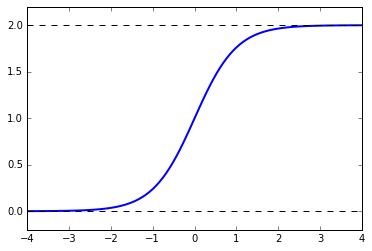

In [5]:
def f(P,t): return P*(2-P)
ts = np.linspace(-4,4,100)
Ps = odeint(f,0.0006707,ts)
plt.plot(ts,Ps, linewidth=2)
plt.plot([-4,4],[0,0], 'k--')
plt.plot([-4,4],[2,2], 'k--')
ax = plt.gca()
ax.set_ylim(-0.2,2.2);

## Higher dimensional systems
In the equation $y'=f(y,t)$, $y$ can be a vector. This allows us to solve systems of equations.

### The Lorenz equations - a 3D example
One very fun example is formed by the famous Lorenz equations:
$$
\begin{align}
  x' &= \sigma(y-x) \\
  y' &= \rho x - y - xz \\
  z' &= xy - \beta z.
\end{align}
$$
These equations, formulated by meteorologist Ed Lorenz, form a *very* stripped down model of water starting to boil in a pot. For some choices of the parameters $\beta$, $\sigma$, and $\rho$, the solution is drawn to a so-called *strange attractor* - a hallmark of chaos. Let's take a look.

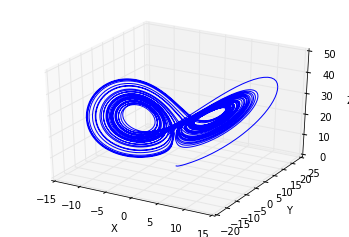

In [8]:
def lorenz(xyz, t, s=3, r=26.5, b=1):
    x,y,z = xyz
    xp = s*(y - x)
    yp = r*x - y - x*z
    zp = x*y - b*z
    return xp, yp, zp
ts = np.linspace(0,100,10000)
sol = odeint(lorenz, [0,1,1.05], ts)
xs,ys,zs = sol.T

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

Note that I called `plt.show`, which is required when you run this without `%matplotlib inline`. You should try that! It opens the image in a separate window where you can rotate the image.

### A gradient system
If $f:\mathbb R^2 \to \mathbb R$, then the gradient of $f$ is the function $\nabla f:\mathbb R^2 \to \mathbb R^2$ defined by
$$\nabla f(x,y) = \langle f_x(x,y), f_y(x,y) \rangle.$$
A fact of fundamental importance is that the gradient, when evaluated at a point, returns a vector that points in the direction of greatest increase of $f$. As a result, we can find a local maximum of a multi-variate function by simply following the gradient vector. In terms of ODEs, this means solving the system
$$
\begin{align}
 x'(t) &= f_x(x(t),y(t)) \\
 y'(t) &= f_y(x(t),y(t)).
\end{align}
$$
A fun example is provided by Matlab's peaks function:
$$
f(x,y) = 3(1-x)^2 e^{-x^2 - (y+1)^2} - 10\,(x/5-x^3-y^5)\,e^{x^2-y^2}-\frac{1}{3}e^{-(x+1)^2-y^2}.
$$

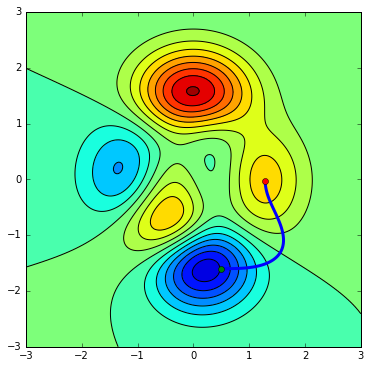

In [9]:
# Define the peaks function
def peaks(x,y): 
    return 3*(1-x)**2*np.exp(-(x**2) - (y+1)**2) - \
        10*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2) - \
        (1/3)*np.exp(-(x+1)**2 - y**2)
# Set up the domain over which we'll evaluate it
X,Y = np.meshgrid(np.linspace(-3,3, 200), np.linspace(-3,3, 200))
# Compute the Z values
Z = peaks(X,Y)

# Plot the contours
plt.contour(X,Y,Z, linewidths=1, linestyles='solid', 
    colors='k', levels = np.linspace(-8,9,18))
# Plot the filling between the contours
plt.contourf(X,Y,Z, levels = np.linspace(-8,9,18))


# Use the numerical differentiator to defind the gradient of peaks
def peaks_x(x,y):
    return derivative(lambda x0: peaks(x0,y), x, 0.001)
def peaks_y(x,y):
    return derivative(lambda y0: peaks(x,y0), y, 0.001)
def grad(xy, t): 
    x = xy[0]
    y = xy[1]
    return (peaks_x(x,y), peaks_y(x,y))
# Solve the IVP 
ts = np.linspace(0,1,100)
sol = odeint(grad, [0.5,-1.6], ts)
xs, ys = sol.T

# Plot the solution
plt.plot(xs,ys, linewidth=3)
# Mark the beginning and end
plt.plot(xs[0],ys[0], 'og')
plt.plot(xs[-1],ys[-1], 'or')

# Fiddle with the appearance
ax = plt.gca()
ax.set_aspect(1)
fig = plt.gcf()
fig.set_figheight(8)

## A higher order equation
A single equation of order larger than one can be reduced to a first order system. As a simple example, let's consider Airy's equation:
$$y''(x) = x\,y(x).$$
This can be written as the system
$$
\begin{align}
 y' &= z \\
 z' &= x\,y.
\end{align}
$$
The solution oughta be oscillatory for $x<0$ and exponential for $x>0$.

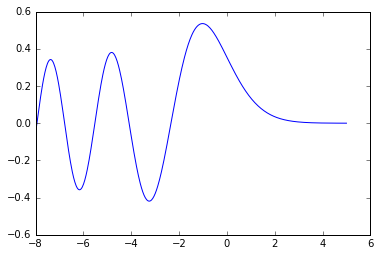

In [10]:
def f(yz,x):
    y=yz[0]
    z=yz[1]
    return [z,x*y]

xs = np.linspace(-8,5,500)
sol = odeint(f, [-0.0527051,0.935561], xs)
ys,yps = sol.T
plt.plot(xs,ys)

## More
### A higher degree system
An example of a higher degree system is provided in our [central orbit page](http://marksmath.org/visualization/orbits/CentralOrbit.html).

### A *much* higher degree system
A *very* high degree system is illustrated by the [$n$-body problem](nBody.html).